<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Gili Gutfeld, 209284512   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 18/1/2023

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [2]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

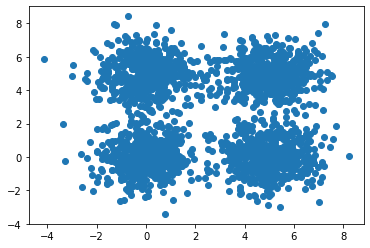

In [3]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [74]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        ######## Helper fields #########
        self.X_fit_ = X      # Here you should store the dataset X. 
                                # This can be useful for the next tasks.
        
        self.labels_ = None     # Here you should store the final labels. 
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.
        
        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
      self.num_of_iterations = 0
      rand_indexes = np.random.choice(X.shape[0], self.n_clusters, replace=False)
      self.centroids = self.X_fit_[rand_indexes]

      for iteration in range(self.max_iter):
        # Update the history and the cost
        self.labels_ = self._get_labels(X)
        self.labels_history.append(self.labels_)
        self.centroids_history.append(self.centroids)
        self.num_of_iterations += 1
        self.centroids = self._get_centroids(X, self.labels_)
        if (self.centroids_history[iteration] == self.centroids).all():
            break
        
      self.labels = self._get_labels(X)

    def predict(self, X):
        #### YOUR CODE HERE ####
        return None

    def _get_distances(self, X):
        distances = [np.sqrt(np.sum((X - c) ** 2)) for c in self.centroids]
        return distances
    
    def _get_labels(self, X):
        labels = []
        distances = []
        # assign samples to clusters
        for x in X:
          # Get the minimal distance from a centroid
          x_distances = self._get_distances(x)
          min_distance = min(x_distances)

          # Put it in the closest cluster
          min_index = np.argmin(x_distances)
          distances.append(min_distance)
          labels.append(min_index)

        cost = self._calculate_cost(distances)
        self.costs.append(cost)
        return labels

    def _get_centroids(self, X, labels):
        centroids = []
        cluster_type = np.unique(labels)
        for type in cluster_type:
          centroids.append(X[labels == type].mean(axis=0))
        return np.array(centroids)
    
    def _calculate_cost(self, X):
        cost = np.sum(np.power(X, 2))
        return cost

Run the algorithm on the 2D dataset

In [75]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

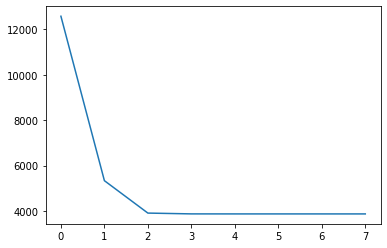

In [76]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 5327.238095399866 <br>
3 clusters: 3868.583168656829 <br>
4 clusters: 2454.705018238201 <br>
6 clusters: 2259.00653394847 <br>
8 clusters: 2004.5976258053058 <br>
10 clusters: 1840.4257455027685 <br>
20 clusters: 1382.155164999934 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

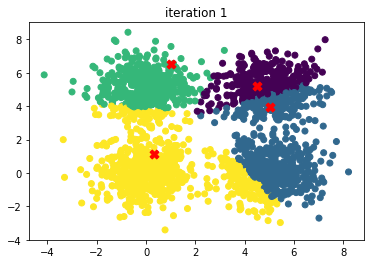

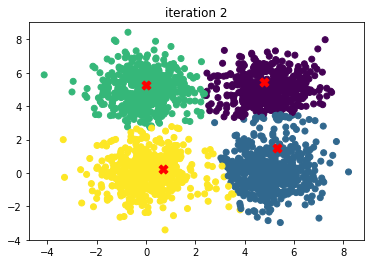

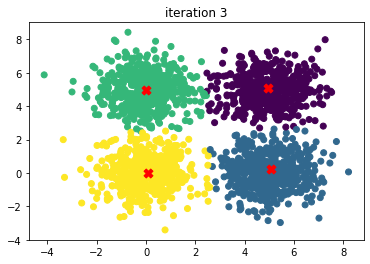

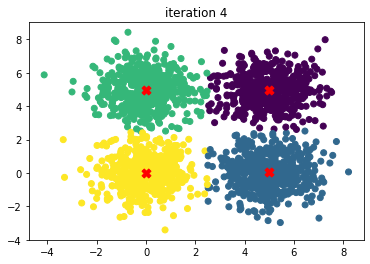

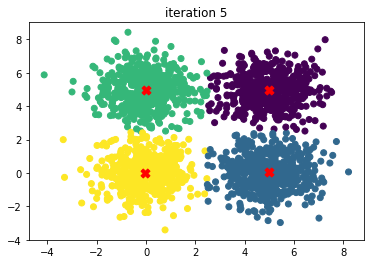

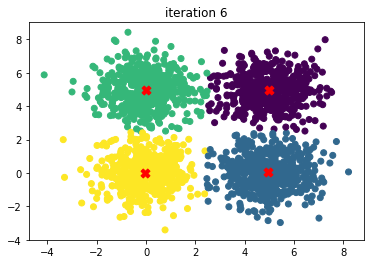

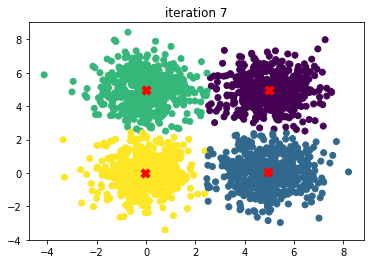

In [77]:
def plot_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=80)

for i in range(kmeans.num_of_iterations):
    plot_clusters(X, kmeans.labels_history[i], kmeans.centroids_history[i])
    plt.title("iteration {}".format(i + 1))
    plt.show()

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        # Calculate the correlation matrix
        X = X - np.mean(X, axis=0)
        C = np.matmul(X.T, X)
        
        # Get the eigen values andvectors from the correlation matrix
        eigen_values, eigen_vectors = np.linalg.eig(C)
        
        # Sort the eigen vectors in descending order
        indexes = np.argsort(-eigen_values)
        eigen_vectors = eigen_vectors[:,indexes]
        
        self.V = eigen_vectors.real
        return self.V

    def transform(self, X, n_dimentions):
        # Add the first n dimensions of eigenvectors to the list
        V_T = []
        for i in range(n_dimentions):
          V_T.append(self.V[:, i])
        V_T = np.array(V_T)
        
        # For each sample, add the dot product with V_T and add it to the list
        X_reduced = []
        for sample in X:
          X_reduced.append(np.matmul(V_T, sample))
        
        return np.array(X_reduced).T



Run the algorithm on MNIST dataset.

In [ ]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2).T

Plot the data in the top 2 principal component space.

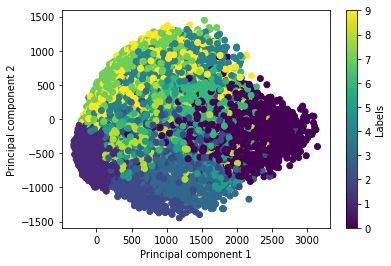

In [ ]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

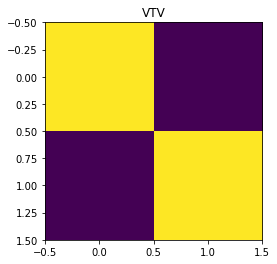

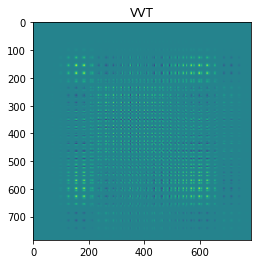

In [ ]:
new_V = pca.V[:,0:2]

VTV = np.dot(new_V.T, new_V)
VVT = np.dot(new_V, new_V.T)

# Plot the two matrices 𝑉𝑇𝑉 and 𝑉𝑉𝑇
plt.figure()
plt.imshow(VTV)
plt.title('VTV')

plt.figure()
plt.imshow(VVT)
plt.title('VVT')

plt.show()

Your Explanation: 
VᵀV: a squared matrix. The elements on the diagonal are the dot product of each eigenvector with itself, and the other elements are the dot product of the row eigenvector with the column eigenvector.
VVᵀ: a squared matrix which its size is the number of samples. Each element in the matrix is the dot product of the row sample with the column sample.

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
  new_V = pca.V[:,0:n_dimentions]
  x_project = np.dot(new_V.T, x)
  x_reconstructed = np.dot(new_V, x_project)
  return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


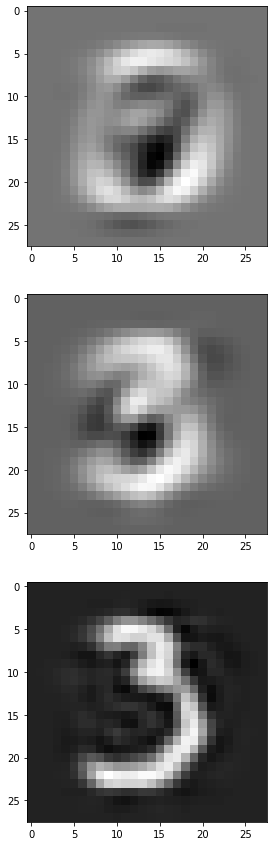

In [ ]:
dimensions = [3, 10, 100]
random_val = np.random.randint(0, high=len(X))
fig, axs = plt.subplots(len(dimensions), 1, figsize=(5, 5 * len(dimensions)))

# For each number of dimension get PCA reconstruction on the random image
for i, dimension in enumerate(dimensions):
    x = pca_reconstruction(X[random_val], dimension)
    axs[i].imshow(x.reshape(28, 28), cmap='gray')

plt.show()